In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
path = '/content/input/animal-faces/afhq/train'


In [ ]:
import shutil
import os

# Silinecek klasörün yolu
folder_path = '/content/afhq/train/.ipynb_checkpoints'

# Klasör varsa sil
if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(".ipynb_checkpoints klasörü başarıyla silindi.")
else:
    print(".ipynb_checkpoints klasörü bulunamadı.")


.ipynb_checkpoints klasörü başarıyla silindi.


In [ ]:
import shutil
import os

# Silinecek klasörün yolu
folder_path = '/content/afhq/val/.ipynb_checkpoints'

# Klasör varsa sil
if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(".ipynb_checkpoints klasörü başarıyla silindi.")
else:
    print(".ipynb_checkpoints klasörü bulunamadı.")


.ipynb_checkpoints klasörü başarıyla silindi.


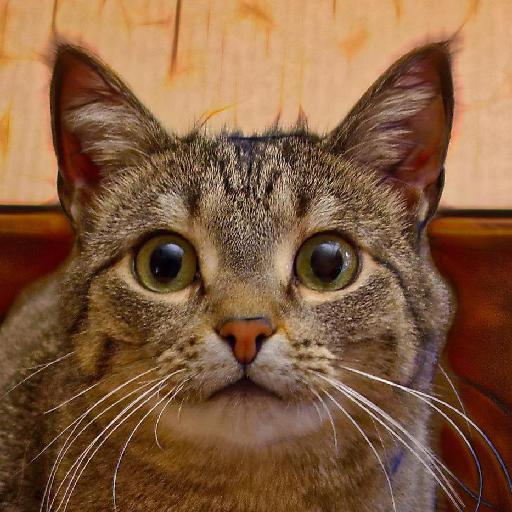

In [ ]:
tf.keras.preprocessing.image.load_img('/content/afhq/train/cat/flickr_cat_000018.jpg')

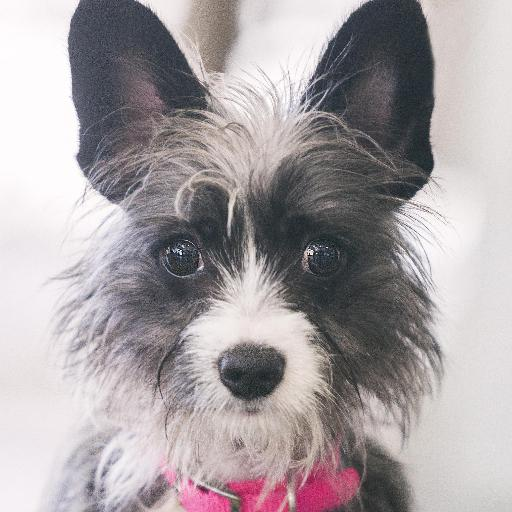

In [ ]:
tf.keras.preprocessing.image.load_img('/content/afhq/train/dog/flickr_dog_000019.jpg')

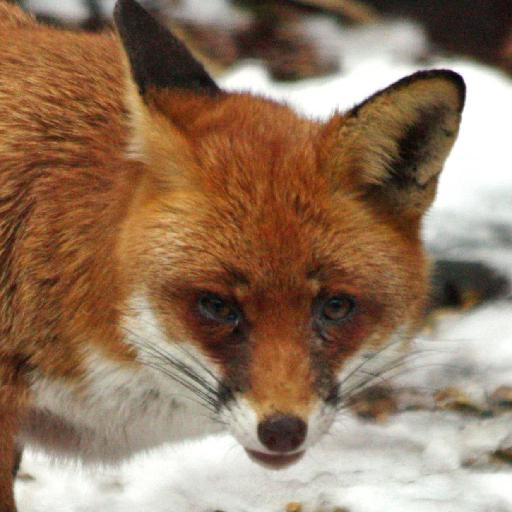

In [ ]:
tf.keras.preprocessing.image.load_img('/content/afhq/train/wild/flickr_wild_000013.jpg')

In [ ]:
training_generator = ImageDataGenerator(rescale=1./255,            #Yeniden Ölçeklendirme
                                        rotation_range=7,          #Rastgele Dönüş
                                        horizontal_flip=True,      #Yatay Döndürme
                                        zoom_range=0.2)            #Yakınlaştırma Aralığı
training_dataset = training_generator.flow_from_directory('/content/afhq/train',
                                                        target_size = (64, 64),      #Yeniden Boyutlandırma
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        shuffle = True)              #Verileri Karıştırma

#generator ile veri yığınları oluşturma kullandığımız parametreler yukarıda gözüküyor.

Found 4217 images belonging to 3 classes.


In [ ]:
print(class_names)


['wild', 'cat', 'dog']


In [ ]:
training_generator = ImageDataGenerator(rescale=1./255,            #Yeniden Ölçeklendirme
                                        rotation_range=7,          #Rastgele Dönüş
                                        horizontal_flip=True,      #Yatay Döndürme
                                        zoom_range=0.2)            #Yakınlaştırma Aralığı
training_dataset = training_generator.flow_from_directory('/content/afhq/train',
                                                        target_size = (64, 64),      #Yeniden Boyutlandırma
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        shuffle = True)              #Verileri Karıştırma

#generator ile veri yığınları oluşturma kullandığımız parametreler yukarıda gözüküyor.

Found 4217 images belonging to 3 classes.


In [ ]:
# training_dataset'in içeriğini kontrol etme
print(training_dataset.classes)


[0 0 0 ... 2 2 2]


In [ ]:
import os

# Verilen dizin yolu
directory_path = '/content/afhq/train'

# Dizindeki alt klasörlerin sayısını bulma
class_count = len(os.listdir(directory_path))

print("Toplam sınıf sayısı:", class_count)


Toplam sınıf sayısı: 3


In [ ]:
import os

# Verilen dizin yolu
directory_path = '/content/afhq/train'

# Dizindeki alt klasörlerin isimlerini alma
class_names = os.listdir(directory_path)

print("Sınıf isimleri:")
print(class_names)


Sınıf isimleri:
['wild', 'cat', 'dog']


In [ ]:
import os

# Verilen dizin yolu
directory_path = '/content/afhq/train'

# Dizindeki alt klasörlerin isimlerini alma
class_names = os.listdir(directory_path)

# .ipynb_checkpoints'ı filtreleme
class_names = [name for name in class_names if name != '.ipynb_checkpoints']

print("Temizlenmiş sınıf isimleri:")
print(class_names)


Temizlenmiş sınıf isimleri:
['wild', 'cat', 'dog']


In [ ]:
training_dataset.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
training_dataset.class_indices

{'cat': 0, 'dog': 1, 'wild': 2}

In [ ]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('/content/afhq/val',
                                                     target_size = (64, 64),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 1430 images belonging to 3 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Yeni model oluşturma
network = Sequential()
network.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Flatten())
network.add(Dense(units = 7317, activation='relu'))
network.add(Dense(units = 7317, activation='relu'))
network.add(Dense(units = 3, activation='softmax'))  # Çıktı katmanı 3 sınıf için ayarlandı

# Modeli derleme
network.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
network.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_9 (Dense)             (None, 7317)             

In [ ]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
historic = network.fit(training_dataset, epochs=5)

Epoch 1/5
132/132 [==============================] - 321s 2s/step - loss: 1.0801 - accuracy: 0.6324
Epoch 2/5
132/132 [==============================] - 310s 2s/step - loss: 0.3669 - accuracy: 0.8601
Epoch 3/5
132/132 [==============================] - 316s 2s/step - loss: 0.2503 - accuracy: 0.9073
Epoch 4/5
132/132 [==============================] - 329s 2s/step - loss: 0.2206 - accuracy: 0.9196
Epoch 5/5
132/132 [==============================] - 315s 2s/step - loss: 0.1827 - accuracy: 0.9296


In [ ]:
test_dataset.class_indices

{'cat': 0, 'dog': 1, 'wild': 2}

In [ ]:
forecasts = network.predict(test_dataset)
forecasts

1430/1430 [==============================] - 62s 43ms/step


array([[1.00000000e+00, 9.14926712e-09, 6.23024077e-10],
       [9.99998689e-01, 7.26766132e-07, 5.57051351e-07],
       [9.97868299e-01, 8.50922370e-04, 1.28084642e-03],
       ...,
       [7.20460527e-03, 5.07228868e-03, 9.87723112e-01],
       [1.04975690e-04, 7.28021769e-05, 9.99822199e-01],
       [1.24752065e-02, 4.30527329e-02, 9.44472015e-01]], dtype=float32)

In [ ]:
forecasts = np.argmax(forecasts, axis = 1)
forecasts

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
test_dataset.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, forecasts)

0.8972027972027972

In [ ]:
test_dataset.class_indices

{'cat': 0, 'dog': 1, 'wild': 2}

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, forecasts)
cm

array([[453,   6,  23],
       [ 23, 409,  52],
       [ 20,  23, 421]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, forecasts))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       482
           1       0.93      0.85      0.89       484
           2       0.85      0.91      0.88       464

    accuracy                           0.90      1430
   macro avg       0.90      0.90      0.90      1430
weighted avg       0.90      0.90      0.90      1430



In [ ]:
image = cv2.imread('/content/afhq/val/wild/flickr_wild_000149.jpg')

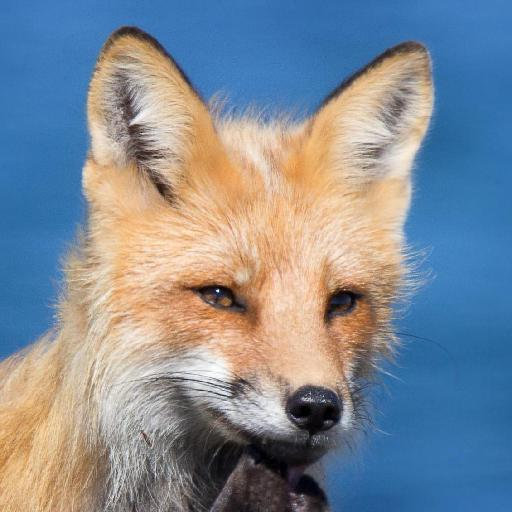

In [ ]:
cv2_imshow(image)

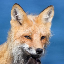

In [ ]:
image = cv2.resize(image, (64, 64)) #Örnek resmi yeniden boyutlandırdık.
cv2_imshow(image)

In [ ]:
image = image / 255   #Örnek olarak seçtiğimiz resmin RGB piksel değerleri
image

array([[[0.71372549, 0.45490196, 0.22352941],
        [0.72156863, 0.4627451 , 0.23137255],
        [0.72941176, 0.47058824, 0.23921569],
        ...,
        [0.74117647, 0.49411765, 0.25882353],
        [0.74509804, 0.49803922, 0.2627451 ],
        [0.74117647, 0.49411765, 0.25882353]],

       [[0.71764706, 0.45882353, 0.22745098],
        [0.7254902 , 0.46666667, 0.23529412],
        [0.73333333, 0.4745098 , 0.24313725],
        ...,
        [0.74509804, 0.49803922, 0.2627451 ],
        [0.74117647, 0.49411765, 0.25882353],
        [0.74117647, 0.49411765, 0.25882353]],

       [[0.71764706, 0.47058824, 0.23529412],
        [0.72156863, 0.4745098 , 0.23921569],
        [0.72156863, 0.4745098 , 0.23921569],
        ...,
        [0.7372549 , 0.49019608, 0.25098039],
        [0.74117647, 0.48627451, 0.24705882],
        [0.74117647, 0.48627451, 0.24705882]],

       ...,

       [[0.52156863, 0.70980392, 0.89019608],
        [0.56078431, 0.75686275, 0.91764706],
        [0.58823529, 0

In [ ]:
image.shape

(64, 64, 3)

In [ ]:
image = image.reshape(-1, 64, 64, 3)
image.shape

(1, 64, 64, 3)

In [ ]:
result = network(image)
result

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[6.1287824e-04, 1.4652298e-02, 9.8473477e-01]], dtype=float32)>

In [ ]:
result = np.argmax(result)
result

2

In [ ]:
test_dataset.class_indices

{'cat': 0, 'dog': 1, 'wild': 2}

In [ ]:
#Ekrana çıktı olarak yazdırılan  makine tahmini sonucu


if result == 0:
  print('Makine Tahmini Kedidir.')
else:
 if result == 1:
    print('Makine Tahmini Köpektir.')
 else:
    print('Makine Tahmini Yabani Hayvandır.')

Makine Tahmini Yabani Hayvandır.


In [ ]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

model_vgg = Sequential()
model_vgg.add(vgg_model)
model_vgg.add(Flatten())
model_vgg.add(Dense(units=256, activation='relu'))
model_vgg.add(Dense(units=3, activation='softmax'))

model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_vgg.summary()


58889256/58889256 [==============================] - 1s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_12 (Dense)            (None, 256)               524544    
                                                                 
 dense_13 (Dense)            (None, 3)                 771       
                                                                 
Total params: 15240003 (58.14 MB)
Trainable params: 15240003 (58.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense

# VGG16 modelini yükleyelim
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Yeni bir Sequential model oluşturalım
model_vgg = Sequential()

# VGG16 modelini ekleyelim
model_vgg.add(vgg_model)

# Tam bağlantı katmanları ekleyelim
model_vgg.add(Flatten())
model_vgg.add(Dense(units=256, activation='relu'))
model_vgg.add(Dense(units=3, activation='softmax'))

# Modeli derleyelim
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_vgg.summary()  # Model özetini görüntüleyelim

# Modeli eğitim verileriyle eğitelim
history_vgg = model_vgg.fit(training_dataset, epochs=5)

# Test verileri üzerinde tahmin yapma
forecasts_vgg = model_vgg.predict(test_dataset)
forecasts_classes_vgg = np.argmax(forecasts_vgg, axis=1)

# Test setinin gerçek sınıfları ile tahmin edilen sınıfları karşılaştırarak doğruluk hesaplama
from sklearn.metrics import accuracy_score
accuracy_vgg = accuracy_score(test_dataset.classes, forecasts_classes_vgg)
print("Accuracy:", accuracy_vgg)

# Karmaşıklık matrisi oluşturma
from sklearn.metrics import confusion_matrix
cm_vgg = confusion_matrix(test_dataset.classes, forecasts_classes_vgg)
print("Confusion Matrix:")
print(cm_vgg)

# Sınıflandırma raporu oluşturma
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(test_dataset.classes, forecasts_classes_vgg))



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 dense_16 (Dense)            (None, 256)               524544    
                                                                 
 dense_17 (Dense)            (None, 3)                 771       
                                                                 
Total params: 15240003 (58.14 MB)
Trainable params: 15240003 (58.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
132/132 [==============================] - 806s 6s/step - loss: 1.2049 - accuracy: 0.3621
Epoch 2/5
132/132 [=========================

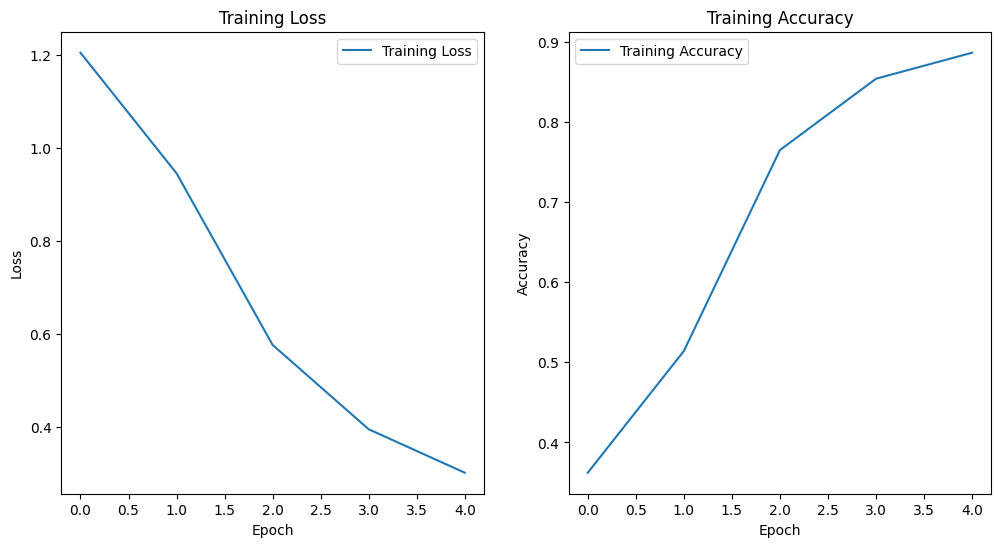

In [ ]:
import matplotlib.pyplot as plt

# Eğitim sürecinin grafikle görselleştirilmesi
plt.figure(figsize=(12, 6))

# Eğitim ve doğrulama (validation) kaybının grafikle gösterilmesi
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Eğitim ve doğrulama (validation) doğruluğunun grafikle gösterilmesi
plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


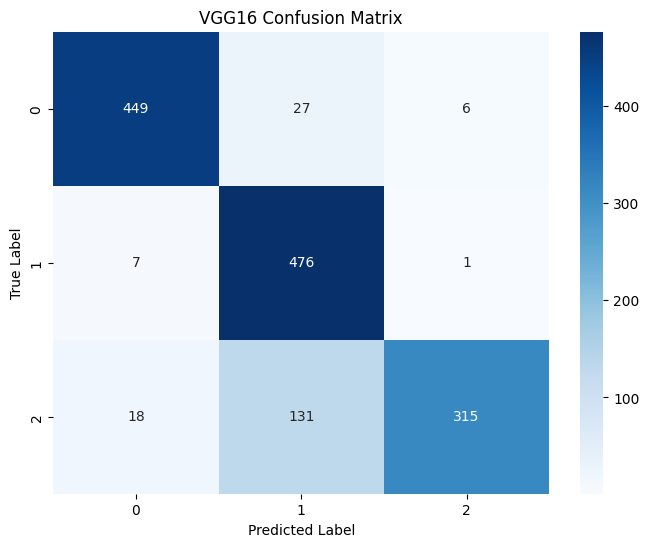

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# VGG16 modeli için karmaşıklık matrisini oluşturma
cm_vgg = confusion_matrix(test_dataset.classes, forecasts_classes_vgg)

# Karmaşıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm_vgg, annot=True, fmt='d', cmap='Blues')
plt.title('VGG16 Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

# Yeni bir Sequential model oluşturalım
model_mlp = Sequential()

# Giriş katmanı (Flatten edilmiş veri)
model_mlp.add(Flatten(input_shape=(64, 64, 3)))

# Tam bağlantılı katmanlar
model_mlp.add(Dense(units=256, activation='relu'))
model_mlp.add(Dense(units=128, activation='relu'))
model_mlp.add(Dense(units=64, activation='relu'))

# Çıkış katmanı
model_mlp.add(Dense(units=3, activation='softmax'))

# Modeli derleyelim
model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_mlp.summary()  # Model özetini görüntüleyelim

# Modeli eğitim verileriyle eğitelim
history_mlp = model_mlp.fit(training_dataset, epochs=5)

# Test verileri üzerinde tahmin yapma
forecasts_mlp = model_mlp.predict(test_dataset)
forecasts_classes_mlp = np.argmax(forecasts_mlp, axis=1)

# Test setinin gerçek sınıfları ile tahmin edilen sınıfları karşılaştırarak doğruluk hesaplama
from sklearn.metrics import accuracy_score
accuracy_mlp = accuracy_score(test_dataset.classes, forecasts_classes_mlp)
print("Accuracy:", accuracy_mlp)

# Karmaşıklık matrisi oluşturma
from sklearn.metrics import confusion_matrix
cm_mlp = confusion_matrix(test_dataset.classes, forecasts_classes_mlp)
print("Confusion Matrix:")
print(cm_mlp)

# Sınıflandırma raporu oluşturma
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(test_dataset.classes, forecasts_classes_mlp))


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 12288)             0         
                                                                 
 dense_18 (Dense)            (None, 256)               3145984   
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dense_21 (Dense)            (None, 3)                 195       
                                                                 
Total params: 3187331 (12.16 MB)
Trainable params: 3187331 (12.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
132/

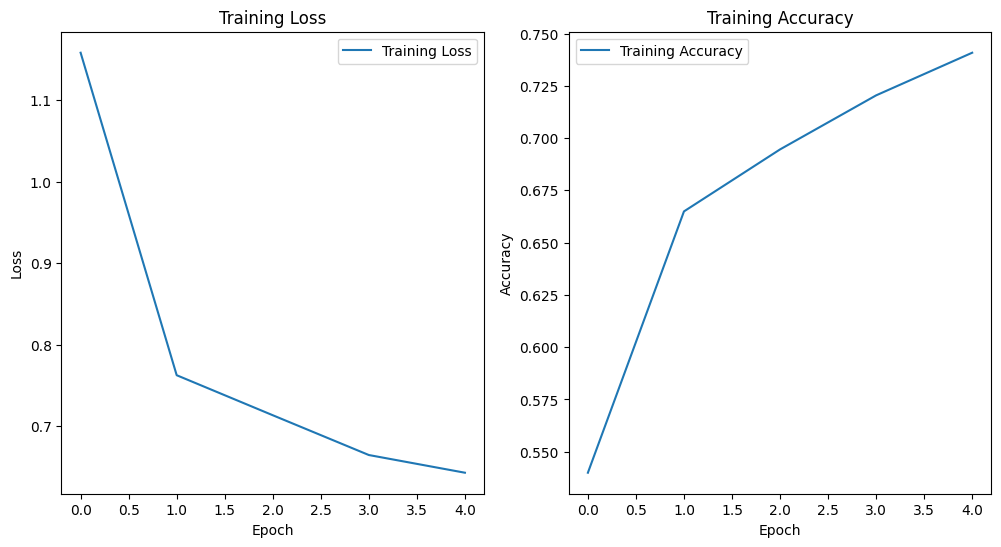

In [ ]:
import matplotlib.pyplot as plt

# Eğitim sürecinin grafikle görselleştirilmesi
plt.figure(figsize=(12, 6))

# Eğitim ve doğrulama (validation) kaybının grafikle gösterilmesi
plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Eğitim ve doğrulama (validation) doğruluğunun grafikle gösterilmesi
plt.subplot(1, 2, 2)
plt.plot(history_mlp.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


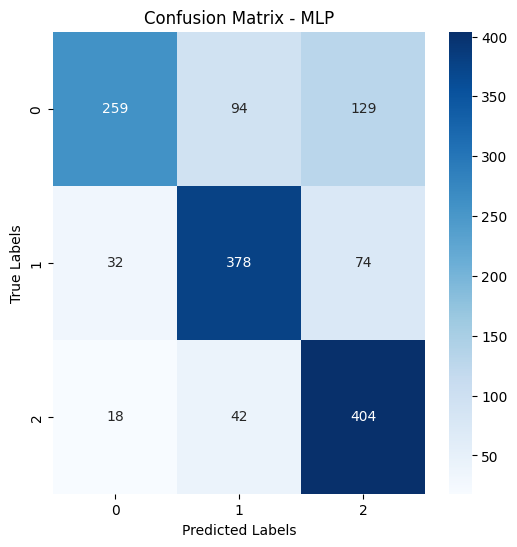

In [ ]:
import seaborn as sns

# Doğruluk (accuracy) görselleştirme
plt.figure(figsize=(6, 6))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - MLP')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


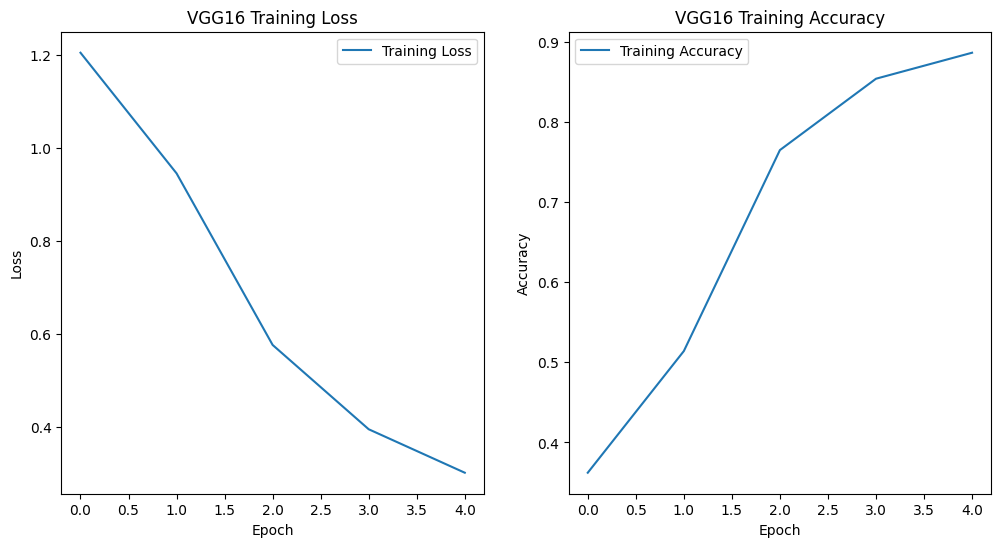

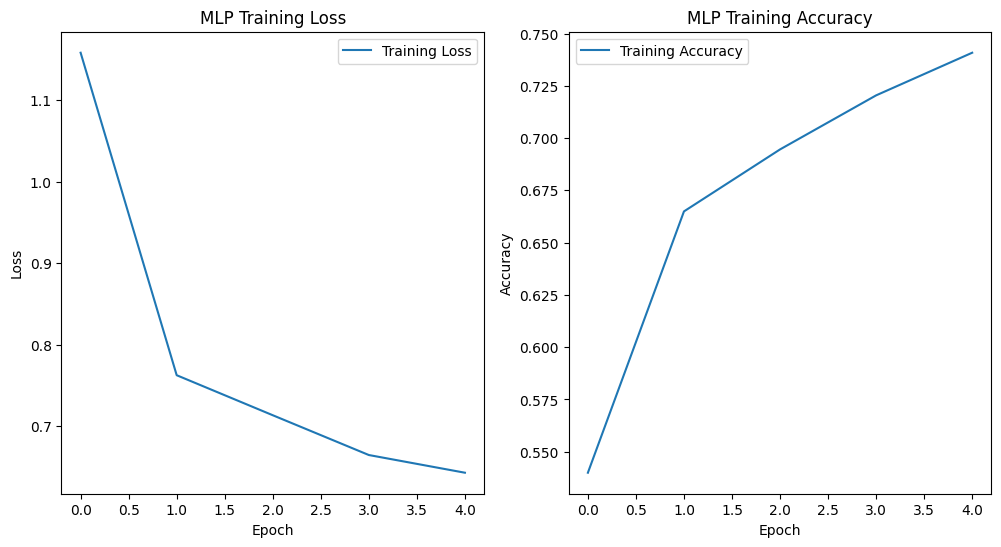

In [ ]:
import matplotlib.pyplot as plt

# Eğitim sürecinin grafikle görselleştirilmesi
plt.figure(figsize=(12, 6))

# VGG16 modeli için eğitim ve doğrulama (validation) kaybının grafikle gösterilmesi
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['loss'], label='Training Loss')
plt.title('VGG16 Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# VGG16 modeli için eğitim ve doğrulama (validation) doğruluğunun grafikle gösterilmesi
plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['accuracy'], label='Training Accuracy')
plt.title('VGG16 Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# MLP modeli için eğitim ve doğrulama (validation) kaybının grafikle gösterilmesi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['loss'], label='Training Loss')
plt.title('MLP Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# MLP modeli için eğitim ve doğrulama (validation) doğruluğunun grafikle gösterilmesi
plt.subplot(1, 2, 2)
plt.plot(history_mlp.history['accuracy'], label='Training Accuracy')
plt.title('MLP Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
